***LABORATORIO 4***

**DEL LAB01**

Para predecir el precio de la miel. El archivo /content/gdrive/MyDrive/420/dataset lab01/honey_purity_dataset20K.csv contiene un conjunto de datos en el que contiene las siguientes columnas.


*   Puntuación de color
*   Densidad
*   Contenido de agua
*   Nivel de pH
*   Conductividad electrica
*   Nivel de fructosa
*   Nivel de glucosa
*   Viscosidad
*   Pureza

**REGRESION LINEAL MULTIPLE SIN REGULARIZACION** 

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
# Cargar datos
data = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420 - copia/laboratorio01/honey_purity_dataset20K.csv', delimiter=',')

# Separar características (X) y variable objetivo (y), en este caso se va a hacer el 90% de los datos para entrenamiento y el 10% para test
X = data[:18000, :9]
y = data[:18000, 9]  #la columna 9 contiene el precio
Xtrain = data[18000:, :9]
Ytrain= data[18000:, 9]

# Obtener la cantidad de filas (tamaño de muestra)
m = y.size
print(m)

# Imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:,1]', 'X[:,2]', 'X[:,3]', 'X[:,4]', 'X[:,5]', 'X[:,6]', 'X[:,7]', 'X[:,8]', 'y'))
print('-' * 88)
for i in range(10):
    print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]))

18000
  X[:,0]  X[:,1]  X[:,2]  X[:,3]  X[:,4]  X[:,5]  X[:,6]  X[:,7]  X[:,8]         y
----------------------------------------------------------------------------------------
    2.81    1.75   23.04    6.29    0.76   39.02   33.63 4844.50    0.68    645.24
    9.47    1.82   17.50    7.20    0.71   38.15   34.41 6689.02    0.89    385.85
    4.61    1.84   23.72    7.31    0.80   27.47   34.36 6883.60    0.66    639.64
    1.77    1.40   16.61    4.01    0.78   31.52   28.15 7167.56    1.00    946.46
    6.11    1.25   19.63    4.82    0.90   29.65   42.52 5125.44    1.00    432.62
    2.17    1.35   20.67    4.11    0.75   27.19   43.54 3967.30    0.80    593.55
    7.15    1.57   13.37    5.79    0.89   43.38   44.94 7384.93    0.95    838.98
    3.17    1.23   23.35    6.64    0.85   43.50   36.33 5598.87    0.66    639.64
    4.98    1.73   16.60    6.61    0.74   22.49   44.74 8800.10    0.95    238.05
    8.49    1.50   15.75    4.50    0.86   49.59   38.13 2675.60    0.82   

In [3]:
def featureNormalize(X):
    # Copia la matriz de características para no modificar la original
    X_norm = X.copy()

    # Inicializa vectores para almacenar medias y desviaciones estándar de las características
    mu = np.zeros(X.shape[1])  # Vector de medias
    sigma = np.zeros(X.shape[1])  # Vector de desviaciones estándar

    # Calcula las medias de las características
    mu = np.mean(X, axis=0)

    # Calcula las desviaciones estándar de las características
    sigma = np.std(X, axis=0)

    # Normaliza las características restando la media y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma

    # Devuelve la matriz de características normalizadas, el vector de medias y el vector de desviaciones estándar
    return X_norm, mu, sigma


In [4]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.81000e+00 1.75000e+00 2.30400e+01 ... 3.36300e+01 4.84450e+03
  6.80000e-01]
 [9.47000e+00 1.82000e+00 1.75000e+01 ... 3.44100e+01 6.68902e+03
  8.90000e-01]
 [4.61000e+00 1.84000e+00 2.37200e+01 ... 3.43600e+01 6.88360e+03
  6.60000e-01]
 ...
 [7.06000e+00 1.56000e+00 1.54400e+01 ... 2.74900e+01 6.97136e+03
  9.70000e-01]
 [4.50000e+00 1.68000e+00 1.94400e+01 ... 2.48000e+01 5.49557e+03
  6.60000e-01]
 [6.55000e+00 1.42000e+00 1.71700e+01 ... 3.50000e+01 7.40794e+03
  1.00000e+00]]
Media calculada: [5.51361667e+00 1.53591500e+00 1.85057339e+01 4.99858833e+00
 7.99705556e-01 3.50338789e+01 3.25481350e+01 5.76090959e+03
 8.25368333e-01]
Desviación estandar calculada: [2.58675799e+00 1.87283376e-01 3.75277502e+00 1.44977876e+00
 5.78800673e-02 8.65011020e+00 7.18968743e+00 2.45917353e+03
 1.39480775e-01]
[[-1.04517573  1.14310733  1.20824352 ...  0.15047455 -0.37264942
  -1.04221054]
 [ 1.52947564  1.51687249 -0.26799738 ...  0.25896327  0.37740745
   0.4633733 ]
 [-0.34932401  1.623

In [5]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)


[[ 1.         -1.04517573  1.14310733 ...  0.15047455 -0.37264942
  -1.04221054]
 [ 1.          1.52947564  1.51687249 ...  0.25896327  0.37740745
   0.4633733 ]
 [ 1.         -0.34932401  1.62366253 ...  0.25200887  0.45653159
  -1.18559947]
 ...
 [ 1.          0.5978075   0.12860191 ... -0.70352641  0.49221838
   1.03692905]
 [ 1.         -0.39184828  0.76934218 ... -1.07767341 -0.10789787
  -1.18559947]
 [ 1.          0.40064952 -0.6189284  ...  0.34102526  0.66974957
   1.25201245]]


In [6]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 5.94802307e+02  9.95511903e-01 -7.46781859e-01  2.44325466e+00
 -2.15379641e-01  8.15226687e-03 -6.25518242e-01 -1.34301033e+00
 -1.93387324e+00  1.03073002e+02]


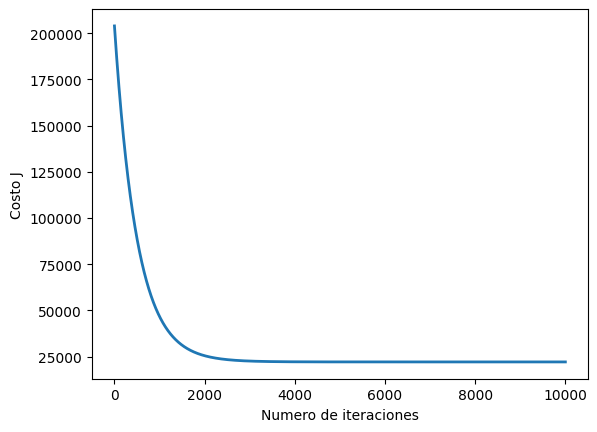

In [8]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [9]:
Xtrain_norm, mu, sigma = featureNormalize(Xtrain)
Xtrain = np.concatenate([np.ones((Xtrain.shape[0], 1)), Xtrain_norm], axis=1)
print(Xtrain)

[[ 1.         -1.26119069 -0.49919155 ... -0.70056945 -1.2896724
   0.659696  ]
 [ 1.          0.61736063  1.24660341 ... -0.01379468 -0.90237266
   1.23138728]
 [ 1.          1.28854734  1.5111178  ...  1.16707257  1.44429624
  -0.19784091]
 ...
 [ 1.         -0.30069936  1.66982643 ... -0.09637281  1.56853424
  -0.19784091]
 [ 1.         -1.23033153  1.35240916 ...  0.70050614 -1.19893137
   0.44531177]
 [ 1.          1.0185297   0.77047751 ...  0.69224833  0.148903
   0.08800473]]


In [10]:
#calcular el precio
price = np.dot(Xtrain, theta)

print("Precio predicho:", price)
print("Valores reales:", Ytrain)


Precio predicho: [667.18113232 724.73880218 571.27287677 ... 573.12680664 639.12318723
 606.94519329]
Valores reales: [398.84 543.41 256.46 ... 768.28 871.11 584.69]


In [11]:
# Calcular el error porcentual
error_porcentual = np.abs(Ytrain - price) / Ytrain * 100

# Imprimir el error porcentual
print("Error porcentual:", error_porcentual)

# Calcular el promedio del error porcentual
#mean -> para calcular el valor promedio de los elementos de un array 
error_porcentual_promedio = np.mean(error_porcentual)

# Imprimir el error porcentual promedio
print("Error porcentual promedio:", error_porcentual_promedio)

Error porcentual: [ 67.28039623  33.36869071 122.75320782 ...  25.40131116  26.63117319
   3.80632357]
Error porcentual promedio: 46.80994866554491


**REGRESION LINEAL MULTIPLE CON REGULARIZACION** 

In [12]:
#regresion lineal multiple con regularizacion
def computeCostMultiReg(X, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)
    temp=theta
    temp[0]=0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J


In [13]:
#descenso por el gradiente con regularizacion 
def gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        #theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) + (lambda_ / m) * theta
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) + (lambda_ / m) * theta
        J_history.append(computeCostMultiReg(X, y, theta, lambda_))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.00000000e+00 -6.72460142e-01  2.48302533e+00 -4.76490579e-02
  9.74644115e-03 -6.29275051e-01 -1.34046701e+00 -1.96368627e+00
  1.03775775e+02]


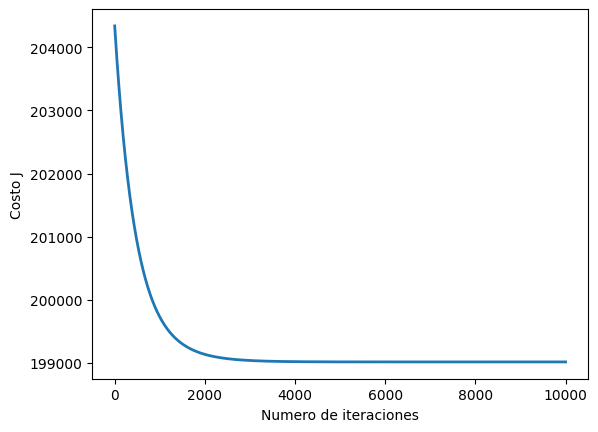

In [14]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 
#alpha = 0.003
num_iters = 10000
lambda_ = 0.1

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMultiReg(X_norm, y, theta, alpha, num_iters,lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [15]:
#calcular el precio
pricereg = np.dot(Xtrain_norm, theta)

print("Precio predicho:", pricereg)
print("Valores reales:", Ytrain)

Precio predicho: [ 74.25224528 130.25784694 -25.00312598 ... -21.38984353  46.11062206
  11.27396354]
Valores reales: [398.84 543.41 256.46 ... 768.28 871.11 584.69]


In [16]:
print(pricereg[1800])
print(Ytrain[1800])

-121.87787140000488
612.96


In [17]:
# Calcular el error porcentual
error_porcentualreg = np.abs(Ytrain - pricereg) / Ytrain * 100

# Imprimir el error porcentual
print("Error porcentual:", error_porcentualreg)

# Calcular el promedio del error porcentual
#mean -> para calcular el valor promedio de los elementos de un array 
error_porcentual_promedioreg = np.mean(error_porcentualreg)

# Imprimir el error porcentual promedio
print("Error porcentual promedio:", error_porcentual_promedioreg)

Error porcentual: [ 81.38294923  76.02954547 109.74932776 ... 102.78412083  94.70668204
  98.07180497]
Error porcentual promedio: 103.77251456151696


**ECUACION DE LA NORMAL SIN REGULARIZACION**

In [18]:
# Cargar datos
data = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420 - copia/laboratorio01/honey_purity_dataset20K.csv', delimiter=',')
# Separar características (X) y variable objetivo (y), en este caso se va a hacer el 90% de los datos para entrenamiento y el 10% para test
X = data[:18000, :9]
y = data[:18000, 9]  #la columna 9 contiene el precio
Xtrain = data[18000:, :9]
Ytrain= data[18000:, 9]
m = y.size
X_cn = np.concatenate([np.ones((m, 1)), X], axis=1)
Xtrain_cn = np.concatenate([np.ones((Xtrain.shape[0], 1)), Xtrain], axis=1)

In [19]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [20]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X_cn, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


Theta calculado a partir de la ecuación de la normal: [-9.79309918e+00  3.80869253e-01 -3.91482095e+00  6.52225361e-01
 -1.27362884e-01  1.26203564e-01 -7.22021776e-02 -1.86621168e-01
 -7.87362540e-04  7.39234272e+02]


In [21]:
#calcular el precio con la ecuacion de la normal
price = np.dot(Xtrain_cn, theta)
print("Precio predicho:", price)
print("Valores reales:", Ytrain)

Precio predicho: [669.11916989 726.85127427 572.86837111 ... 574.77645072 640.99252865
 608.630625  ]
Valores reales: [398.84 543.41 256.46 ... 768.28 871.11 584.69]


In [22]:
# Calcular el error porcentual
error_porcentual = np.abs(Ytrain - price) / Ytrain * 100

# Imprimir el error porcentual
print("Error porcentual:", error_porcentual)

# Calcular el promedio del error porcentual
#mean -> para calcular el valor promedio de los elementos de un array 
error_porcentual_promedio = np.mean(error_porcentual)

# Imprimir el error porcentual promedio
print("Error porcentual promedio:", error_porcentual_promedio)

Error porcentual: [ 67.76631478  33.7574344  123.37532992 ...  25.18659203  26.41658015
   4.09458431]
Error porcentual promedio: 46.89666372184196


**ECUACION DE LA NORMAL CON REGULARIZACION**

In [23]:
#ecuacion de la normal con regularizacion 
def normalEqnReg(X, y, lambda_):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + lambda_ * np.identity(X.shape[1])),X.T),y)

    return theta

In [24]:
# calcular los parametros con la ecuacion de la normal con regularizacion
lambda_ = 0.1
theta = normalEqnReg(X, y, lambda_);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

Theta calculado a partir de la ecuación de la normal: [ 3.69129978e-01 -5.09072692e+00  6.18566581e-01 -2.18877931e-01
 -5.48386808e+00 -8.35903866e-02 -2.01387023e-01 -8.08457715e-04
  7.37621991e+02]


In [25]:
#calcular el precio con la ecuacion de la normal
price = np.dot(Xtrain, theta)
print("Precio predicho:", price)
print("Valores reales:", Ytrain)

Precio predicho: [668.70027086 726.85204333 572.04210318 ... 574.76174085 641.03479728
 607.75785076]
Valores reales: [398.84 543.41 256.46 ... 768.28 871.11 584.69]


In [26]:
# Calcular el error porcentual
error_porcentual = np.abs(Ytrain - price) / Ytrain * 100

# Imprimir el error porcentual
print("Error porcentual:", error_porcentual)

# Calcular el promedio del error porcentual
#mean -> para calcular el valor promedio de los elementos de un array 
error_porcentual_promedio = np.mean(error_porcentual)

# Imprimir el error porcentual promedio
print("Error porcentual promedio:", error_porcentual_promedio)

Error porcentual: [ 67.66128544  33.75757592 123.05314793 ...  25.18850668  26.41172788
   3.94531303]
Error porcentual promedio: 46.89600765813732


**DEL LAB02**

Aplicando un modelo de regresión logistica(clasificación) para predecir la probabilidad de abandono de un cliente del servicio bancario.

El dataset cuenta con los siguientes datos:
- Apellido: Etiqueta de apellidos codificados
- Surname_tfidf_0-4: Funciones creadas aplicando TFIDF Vectorizer a los apellidos
- Puntuación crediticia: Un valor numérico que representa la puntuación crediticia del cliente
- Geografía: El país donde reside el cliente (Francia, España o Alemania)
- Género: El sexo del cliente (Masculino o Femenino)
- Edad: La edad del cliente.
- Tenencia: el número de años que el cliente ha estado en el banco
- Saldo: el saldo de la cuenta del cliente
- NumOfProducts: el número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito)
- HasCrCard: si el cliente tiene un crédito tarjeta (1 = sí, 0 = no)
- IsActiveMember: si el cliente es un miembro activo (1 = sí, 0 = no)
- Salarioestimado: el salario estimado del cliente
- Alemania, Francia, España: una característica de geografía codificada en caliente
- Masculino, femenino: una característica de género codificada en caliente
- Mem_no_Products: NumOfProducts * IsActiveMember
- Cred_Bal_Sal: (Puntuación de crédito * Saldo) / Salario estimado
- Bal_sal: Saldo / Salario estimado
- Tenure_Age: Tenure / Edad
- Age_Tenure_product: Edad * Tenure

Y la salida:
- Salida: si el cliente ha abandonado (1 = sí , 0 = no)

**REGRESION LOGISTICA SIN REGULARIZACION**

In [27]:
# Cargar datos
data = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420 - copia/laboratorio02/datasetBank.csv', delimiter=',')
#80% de los datos para entrenamiento y 20% para test
X_train, y_train = data[:140022, 0:24], data[:140022, 24]
X_test, y_test = data[140022:, 0:24], data[140022:, 24]
X = X_train
y = y_train
print(X)
print(y)

[[2.02300000e+03 6.68000000e+02 3.30000000e+01 ... 0.00000000e+00
  9.09090909e-02 9.90000000e+01]
 [2.02400000e+03 6.27000000e+02 3.30000000e+01 ... 0.00000000e+00
  3.03030303e-02 3.30000000e+01]
 [1.23600000e+03 6.78000000e+02 4.00000000e+01 ... 0.00000000e+00
  2.50000000e-01 4.00000000e+02]
 ...
 [2.06200000e+03 6.19000000e+02 3.40000000e+01 ... 0.00000000e+00
  8.82352941e-02 1.02000000e+02]
 [7.01000000e+02 5.83000000e+02 5.80000000e+01 ... 2.46233414e+00
  1.20689655e-01 4.06000000e+02]
 [1.00100000e+03 7.06000000e+02 5.30000000e+01 ... 0.00000000e+00
  1.50943396e-01 4.24000000e+02]]
[0. 0. 0. ... 0. 1. 1.]


In [28]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [29]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
#z=0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [30]:
# llama featureNormalize que ya se tiene definido para las anteriores predicciones 
X_norm, mu, sigma = featureNormalize(X)

In [31]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [32]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [33]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-1.77425105e+00 -1.44280037e-03 -6.04654652e-02  7.42228713e-01
  9.88988547e-03 -1.30677752e-01 -4.53328113e-01 -7.07636425e-02
 -4.34494371e-01  4.78169155e-02 -1.78136348e-02 -5.87213336e-04
 -1.45005912e-02 -4.75008286e-02 -1.75131799e-02 -1.67374594e-01
  3.33554691e-01 -1.27741139e-01  1.68129095e-01 -1.68129095e-01
 -2.46812653e-01 -4.02467903e-03 -2.82672878e-03 -1.85705404e-01
  1.01477271e-01]


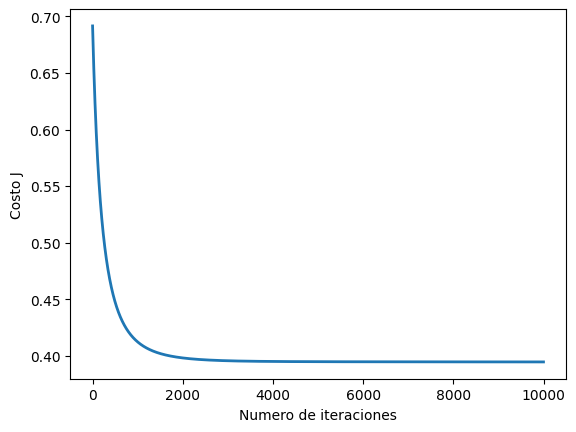

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [35]:
# Normalizar el conjunto de características de prueba y obtener la media (mu) y la desviación estándar (sigma)
X_test_norm, mu, sigma = featureNormalize(X_test)

# Obtener las dimensiones de la matriz de características normalizadas
m, n = X_test_norm.shape

# Agregar una columna de unos al inicio de la matriz de características normalizadas
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

# Calcular la salida del modelo (probabilidad de si el cliente abandona o no el servicio) para el conjunto de prueba normalizado
abandona= sigmoid(np.dot(X_test_norm, theta))

# Imprimir las probabilidades de abandono calculadas para cada instancia en el conjunto de prueba
print(abandona)
print(y_test)

[0.13114694 0.02031236 0.02042286 ... 0.12335671 0.06086205 0.14314709]
[0. 0. 0. ... 0. 0. 1.]


In [36]:
#Efectividad de abandona con ytest
abandona[abandona >= 0.5] = 1
abandona[abandona < 0.5] = 0
print(abandona)
print(y_test)
#Porcentaje de acierto
porcentaje = np.mean(abandona == y_test) * 100
print("Porcentaje de acierto:", porcentaje)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]
Porcentaje de acierto: 82.6686853682226


**REGRESION LOGISTICA CON REGULARIZACION**

In [37]:
#regresion logistica con regularizacion
def calcularCostoReg(theta, X, y, lambda_):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    temp=theta
    temp[0]=0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    return J

In [38]:
#Descenso por el gradiente palicando reularizacion
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        temp=theta
        temp[0]=0
        theta = theta - (alpha / m) * (h - y).dot(X) + (lambda_ / m) * temp

        J_history.append(calcularCostoReg(theta, X, y, lambda_))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.         -0.03671277  0.60118482 -0.07338786 -0.11323735 -0.36439263
 -0.04104191 -0.46325865  0.02975234 -0.00797672  0.00252379 -0.00986228
 -0.02571    -0.01059221 -0.12747429  0.25848537 -0.10166004  0.1064079
 -0.1064079   0.11796305 -0.00270695 -0.00301672  0.04540415  0.00732195]


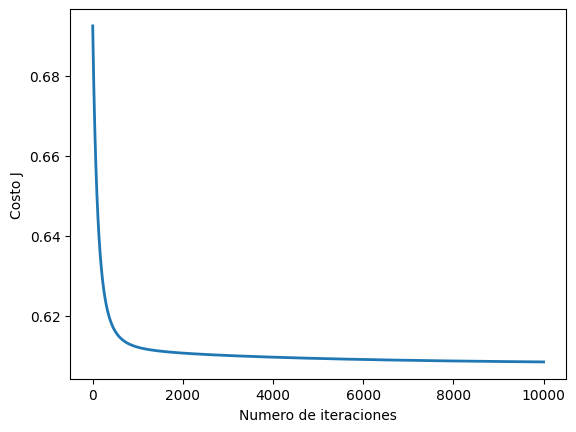

In [39]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000
lambda_ = 0.1
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(24)
theta, J_history = descensoGradienteReg(theta, X_norm, y, alpha, num_iters,lambda_)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [40]:
# Normalizar el conjunto de características de prueba y obtener la media (mu) y la desviación estándar (sigma)
X_test_norm, mu, sigma = featureNormalize(X_test)

# Obtener las dimensiones de la matriz de características normalizadas
m, n = X_test_norm.shape

# Calcular la salida del modelo (probabilidad de si el cliente abandona o no el servicio) para el conjunto de prueba normalizado
abandona= sigmoid(np.dot(X_test_norm, theta))

# Imprimir las probabilidades de abandono calculadas para cada instancia en el conjunto de prueba
print(abandona)
print(y_test)

[0.56544363 0.23203042 0.2333668  ... 0.43746532 0.3380268  0.48094826]
[0. 0. 0. ... 0. 0. 1.]


In [41]:
#Efectividad de abandona con ytest
abandona[abandona >= 0.5] = 1
abandona[abandona < 0.5] = 0
print(abandona)
print(y_test)
#Porcentaje de acierto
porcentaje = np.mean(abandona == y_test) * 100
print("Porcentaje de acierto:", porcentaje)

[1. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]
Porcentaje de acierto: 67.16277209621208


**DEL LAB03**

Lo que se quiere buscar con el dataset es predecir el tiempo de incumplimiento de un cliente con 79 caracteristicas y "Y" donde se clasifica por:

1: Incumplimiento en 1 a 6 meses

2: Incumplimiento en 7 a 12 meses

3: Incumplimiento en 13 a 18 meses

0: No es un incumplidor en 18 meses

**REGRESION LOGISTICA (CLASIFICACION MULTICLASE) CON REGULACION**

In [42]:
# Modulo de optimizacion en scipy
from scipy import optimize

In [43]:
# La entrada es de 80 elemento contando con x0
input_layer_size  = 80

# 4 etiquetas
num_labels = 4
#Datasaet ya procesado con panda 
datax= np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420 - copia/laboratorio03/train_allxPanda.csv', delimiter=',')
datay = np.loadtxt('C:/Users/kiens/OneDrive/Escritorio/1-24/SIS420/IA-SIS420 - copia/laboratorio03/train_y.csv')
#Considerando el 80% para el entrenamiento
Xtrain = datax[:32000, :]
ytrain = datay[:32000]
# 20% para el test
Xtest = datax[32000:40000,:]
ytest = datay[32000:40000]



#ytrain[ytrain == 3] = 0
#ytest-=1
#ytrain[ytrain > 0] -= 1
#ytest[ytest > 0] -= 1

# print(y)


m = ytrain.size

In [44]:
def  featureNormalize(X,Xt):
    #X_norm = X.copy()
    #mu = np.zeros(X.shape[1])
    #sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    Xt_norm = (Xt - mu) / sigma

    return X_norm,Xt_norm, mu, sigma

In [45]:
# llama featureNormalize con los datos cargados
X_norm,Xt_norm, mu, sigma = featureNormalize(Xtrain,Xtest)

In [46]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = Xtrain.shape
# Agraga el termino de intercepción a A
#X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
#x,y=Xtest.shape
#Xt = np.concatenate([np.ones((x, 1)), Xt_norm], axis=1)

In [47]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [48]:
def lrCostFunctionReg(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [49]:
def oneVsAllReg(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunctionReg,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [50]:
lambda_ =0.01
all_theta = oneVsAllReg(X, ytrain, num_labels, lambda_)
print(all_theta.shape)

C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\3059814240.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\3059814240.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\3059814240.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\3059814240.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\30

(4, 80)


In [51]:
print(all_theta)

[[ 2.17306871e+00  2.10718669e-02 -9.37613783e-03 -3.24179454e-04
   1.59898764e-01  1.87837928e-02  4.11582033e-01 -3.95437921e-01
   4.52316600e-01 -1.86795842e-02 -8.56255261e-03 -3.77290037e-02
  -3.45303198e-02 -3.79893371e-01 -3.93752350e-01 -2.92263894e-01
   2.84277709e-01 -7.91418264e-01  1.49768378e-01 -1.12448940e-01
   7.77549552e-02 -2.76910655e-01 -2.27635144e-01  1.33979330e-01
   7.41899963e-02  4.03434826e-02  4.52178772e-01  6.05912754e-01
   1.62413412e-01 -4.76337739e-02 -3.11498804e-02 -2.58970688e-01
  -1.43686388e-02  2.71468839e-02 -4.53613903e-02 -7.10128443e-01
   1.10163462e-02 -2.47172717e-02  2.60410740e-02 -1.19646843e-02
   1.08112093e-02 -1.51681360e-02 -1.20961660e-01  1.28980292e-02
   4.55387475e-01  5.29343924e-02  4.86516581e-02 -4.50012625e-03
  -3.98660743e-02  3.57293646e-03 -1.37045983e-02 -2.65155519e-02
  -2.19293588e-01  1.69524892e-01 -3.06793110e-01 -1.75147179e-01
  -1.00078990e-01 -5.87906928e-01  3.28249003e-01 -3.67438004e-01
  -2.58145

In [52]:
def predictOneVsAllReg(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    #p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    #print(X.shape)
    return p

In [53]:
import sys
#np.set_printoptions(threshold=sys.maxsize)

#print(Xt_norm.shape)
pred = predictOneVsAllReg(all_theta, Xt_norm)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == ytest) * 100))
#XPrueba = Xtest_norm[:, :].copy()
#print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
#XPrueba = np.concatenate([np.ones((8000, 1)), XPrueba], axis=1)
#print(XPrueba.shape)
#p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
#print(pred.shape)
print(pred)

# displayData(X[1002:1003, :])
print(ytest[:])

Precision del conjuto de entrenamiento: 81.15%
[0 0 0 ... 0 2 0]
[0. 0. 0. ... 0. 2. 0.]


**REGRESION LOGISTICA (CLASIFICACION MULTICLASE) SIN REGULACION**

In [59]:
def lrCostFunction(theta, X, y):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    #temp = theta
    #temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
      #grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [62]:
#One vs All sin regularizacion
def oneVsAll(X, y, num_labels):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c)),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [63]:
all_theta = oneVsAll(X, ytrain, num_labels)
print(all_theta.shape)

C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\2550069342.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\2550069342.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\2550069342.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\2550069342.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\2550069342.py:49: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\kiens\AppData\Local\Temp\ipykernel_15012\25500

(4, 80)


In [64]:
print(all_theta)

[[ 2.16578465e+00  1.96490141e-02 -1.30207675e-02  3.89641843e-04
   1.61738475e-01  2.14359647e-02  4.11890190e-01 -3.96716518e-01
   4.53589721e-01 -1.50108689e-02 -1.18640062e-02 -3.73592945e-02
  -3.89728967e-02 -3.81459563e-01 -3.96570780e-01 -2.95339107e-01
   2.52253568e-01 -6.95967239e-01  1.55239906e-01 -1.15178308e-01
   8.03155072e-02 -2.79435184e-01 -2.28476137e-01  1.32452134e-01
   7.38238941e-02  4.12410782e-02  4.08939998e-01  5.10112499e-01
   1.61769774e-01 -8.66608158e-02 -3.27628399e-02 -2.54292737e-01
  -4.01547980e-02  2.53643668e-02 -4.63006603e-02 -6.51119125e-01
   2.10150262e-02 -3.61612996e-02  1.80848495e-02 -1.14211070e-02
   5.31925925e-03 -1.73348355e-02 -1.14969727e-01  6.82689596e-03
   4.40161320e-01  5.18175340e-02  4.79356828e-02  6.11819652e-03
  -3.58182589e-02  5.26867162e-03 -1.12581339e-02 -2.31514976e-02
  -2.29415171e-01  1.65406034e-01 -2.57010594e-01 -1.85043067e-01
  -9.76792040e-02 -6.02940885e-01  3.33710862e-01 -3.66248259e-01
  -2.62127

In [65]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    #p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
    #print(X.shape)
    return p

In [66]:
import sys
#np.set_printoptions(threshold=sys.maxsize)

#print(Xt_norm.shape)
pred = predictOneVsAll(all_theta, Xt_norm)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == ytest) * 100))
#XPrueba = Xtest_norm[:, :].copy()
#print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
#XPrueba = np.concatenate([np.ones((8000, 1)), XPrueba], axis=1)
#print(XPrueba.shape)
#p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
#print(pred.shape)
print(pred)

# displayData(X[1002:1003, :])
print(ytest[:])

Precision del conjuto de entrenamiento: 81.10%
[0 0 0 ... 0 2 0]
[0. 0. 0. ... 0. 2. 0.]
